In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd 

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
df_merged = pd.read_csv('../data/processed/complete_merged.csv')

In [14]:
# Basic information about the merged dataset
print("Dataset Shape:", df_merged.shape)
print("\nColumn Information:")
print(df_merged.dtypes)
print("\nMissing Values:")
print(df_merged.isnull().sum())

Dataset Shape: (696, 79)

Column Information:
Country                                                object
Year                                                  float64
Agricultural production index (2014-2016=100)         float64
Balance of payments, current account (million US$)    float64
CPI: Consumer Price Index (2010=100)                  float64
                                                       ...   
Region                                                 object
Sex ratio (m per 100 f)                               float64
Surface area (km2)                                    float64
UN membership date                                     object
Capital_city_pop                                      float64
Length: 79, dtype: object

Missing Values:
Country                                                 0
Year                                                    0
Agricultural production index (2014-2016=100)         102
Balance of payments, current account (million US$)    1

In [15]:
# Descriptive statistics for numerical variables
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns
print("Descriptive Statistics for Numerical Variables:")
df_merged[numeric_cols].describe()

Descriptive Statistics for Numerical Variables:


/Users/kenjiminemura/.pyenv/versions/3.12.4/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/kenjiminemura/.pyenv/versions/3.12.4/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Year,Agricultural production index (2014-2016=100),"Balance of payments, current account (million US$)",CPI: Consumer Price Index (2010=100),Economy: Agriculture (% of Gross Value Added),Economy: Industry (% of Gross Value Added),Economy: Services and other activity (% of GVA),Employment in agriculture (% of employed),Employment in industry (% of employed),Employment in services (% employed),...,Pop. using safely managed drinking water - Urban/Pop. using safely managed drinking water - Rural Ratio,Pop. using safely managed sanitation - Urban (%),Pop. using safely managed sanitation - Rural (%),Pop. using safely managed sanitation - Urban/Pop. using safely managed sanitation - Rural Ratio,Exchange rate (per US$),"Pop. density (per km2, 2024)","Population (000, 2024)",Sex ratio (m per 100 f),Surface area (km2),Capital_city_pop
count,696.000000,594.000000,562.000000,586.000000,621.000000,630.000000,630.000000,578.000000,579.000000,579.000000,...,223.000000,350.000000,266.000000,248.000000,693.000000,690.000000,6.900000e+02,690.000000,6.780000e+02,693.000000
mean,2019.666667,105.727273,14418.112100,539.167235,11.336071,26.722381,62.090635,23.210727,19.493264,57.224352,...,295.619837,54.044286,46.160526,130.402818,960.430303,474.423043,3.537770e+04,100.505217,5.915811e+05,2465.943290
std,3.684435,15.708872,55979.475881,4690.865029,11.960299,11.619798,14.917319,21.462605,7.646032,18.220817,...,547.529802,29.803837,28.614064,93.870670,4108.343302,2366.719301,1.392879e+05,15.424833,1.793605e+06,4717.440324
min,2015.000000,64.000000,0.000000,88.000000,0.000000,4.500000,16.400000,0.100000,3.100000,10.200000,...,68.969849,0.000000,1.200000,32.751092,0.300000,0.100000,2.000000e+00,82.000000,2.000000e+00,0.100000
25%,2015.000000,99.000000,331.000000,111.000000,2.400000,18.425000,52.325000,4.125000,14.300000,44.500000,...,117.127249,29.225000,21.825000,84.857067,1.000000,37.800000,5.250000e+02,95.200000,4.033000e+03,136.000000
50%,2020.000000,102.000000,1509.000000,127.000000,7.600000,25.800000,61.200000,16.700000,19.200000,60.000000,...,161.071429,46.300000,44.400000,104.941429,8.100000,95.750000,5.711500e+03,98.500000,8.370600e+04,919.400000
75%,2024.000000,112.000000,6107.000000,155.000000,18.000000,33.675000,72.875000,36.575000,24.000000,71.150000,...,284.656264,83.950000,63.475000,137.523496,136.200000,242.600000,2.447900e+04,101.400000,4.350520e+05,2475.200000
max,2024.000000,220.000000,818822.000000,93584.000000,75.600000,69.800000,94.500000,86.300000,54.100000,93.200000,...,4840.000000,100.000000,100.000000,761.904762,42000.000000,25926.800000,1.450936e+06,248.200000,1.709825e+07,37435.200000


# Análisis Exploratorio de Datos (EDA)

## 1. Análisis de Variables Categóricas

Primero vamos a analizar las variables categóricas del dataset.

In [18]:
# Análisis de variables categóricas
categorical_cols = df_merged.select_dtypes(include=['object']).columns
print("Variables categóricas:", list(categorical_cols))
print("\n" + "="*50)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Valores únicos: {df_merged[col].nunique()}")
    print("Distribución de frecuencias:")
    value_counts = df_merged[col].value_counts()
    print(value_counts.head(10))  # Top 10 most frequent values
    print("-" * 30)

Variables categóricas: ['Country', 'Capital city', 'National currency', 'Region', 'UN membership date']


Country:
Valores únicos: 232
Distribución de frecuencias:
Country
Afghanistan                 3
Panama                      3
New Caledonia               3
New Zealand                 3
Nicaragua                   3
Niger                       3
Nigeria                     3
Niue                        3
North Macedonia             3
Northern Mariana Islands    3
Name: count, dtype: int64
------------------------------

Capital city:
Valores únicos: 232
Distribución de frecuencias:
Capital city
Kabul          3
Panama City    3
Nouméa         3
Wellington     3
Managua        3
Niamey         3
Abuja          3
Alofi          3
Skopje         3
Garapan        3
Name: count, dtype: int64
------------------------------

National currency:
Valores únicos: 156
Distribución de frecuencias:
National currency
Euro (EUR)                    93
US Dollar (USD)               45
E. Caribbean D

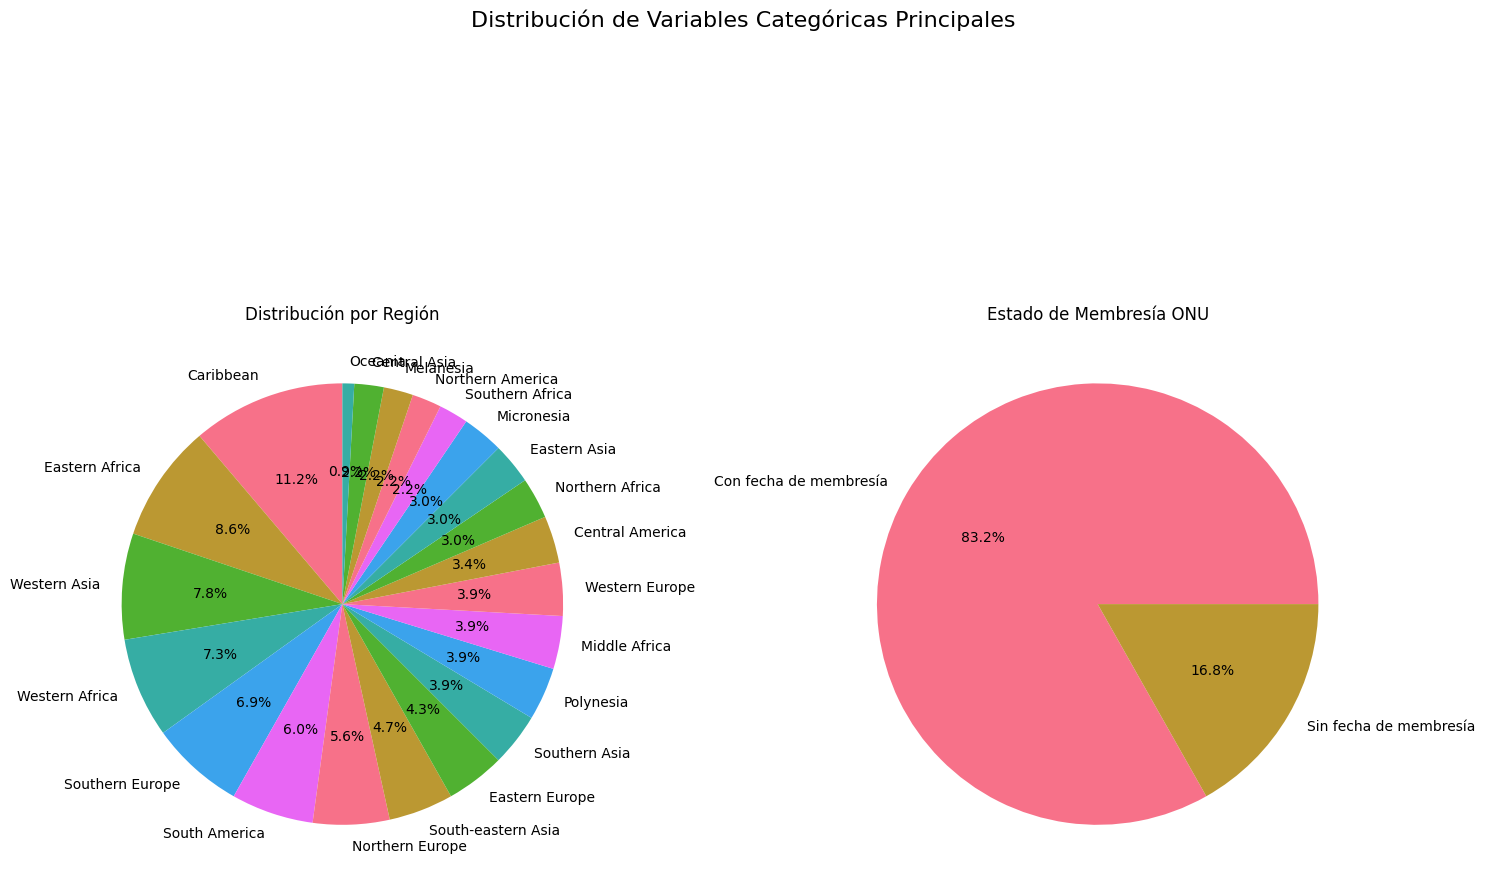

In [ ]:
# Visualización de variables categóricas importantes
fig, axes = plt.subplots(1, 2, figsize=(15, 12))
fig.suptitle('Distribución de Variables Categóricas Principales', fontsize=16)

# Región 
region_counts = df_merged['Region'].value_counts()
axes[0].pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribución por Región')

# UN membership status - This variable tells us wether the country is a member of the UN or not
membership_status = df_merged['UN membership date'].isna().value_counts()
axes[1].pie([membership_status[False], membership_status[True]], 
               labels=['Con fecha de membresía', 'Sin fecha de membresía'], 
               autopct='%1.1f%%')
axes[1].set_title('Estado de Membresía ONU')

plt.tight_layout()
plt.show()

## 2. Análisis de Variables Numéricas - Distribuciones

In [ ]:
# Seleccionar variables económicas clave para análisis detallado
key_economic_vars = [
    "GDP per capita (current US$)",
    "GDP growth rate (annual %, const. 2015 prices)",
    "Unemployment (% of labour force)",
    "Health: Physicians (per 1 000 pop.)",
    "Energy supply per capita (Gigajoules)",
    "Life expectancy at birth - Female (years)",
    "Life expectancy at birth - Male (years)",
    ""
]

print("Key Variables to Analyze")
for var in key_economic_vars:
    print(f"- {var}")

Key Variables to Analyze
- GDP per capita (current US$)
- GDP growth rate (annual %, const. 2015 prices)
- Unemployment (% of labour force)
- Health: Physicians (per 1 000 pop.)
- Energy supply per capita (Gigajoules)
- Life expectancy at birth - Female (years)
- Life expectancy at birth - Male (years)


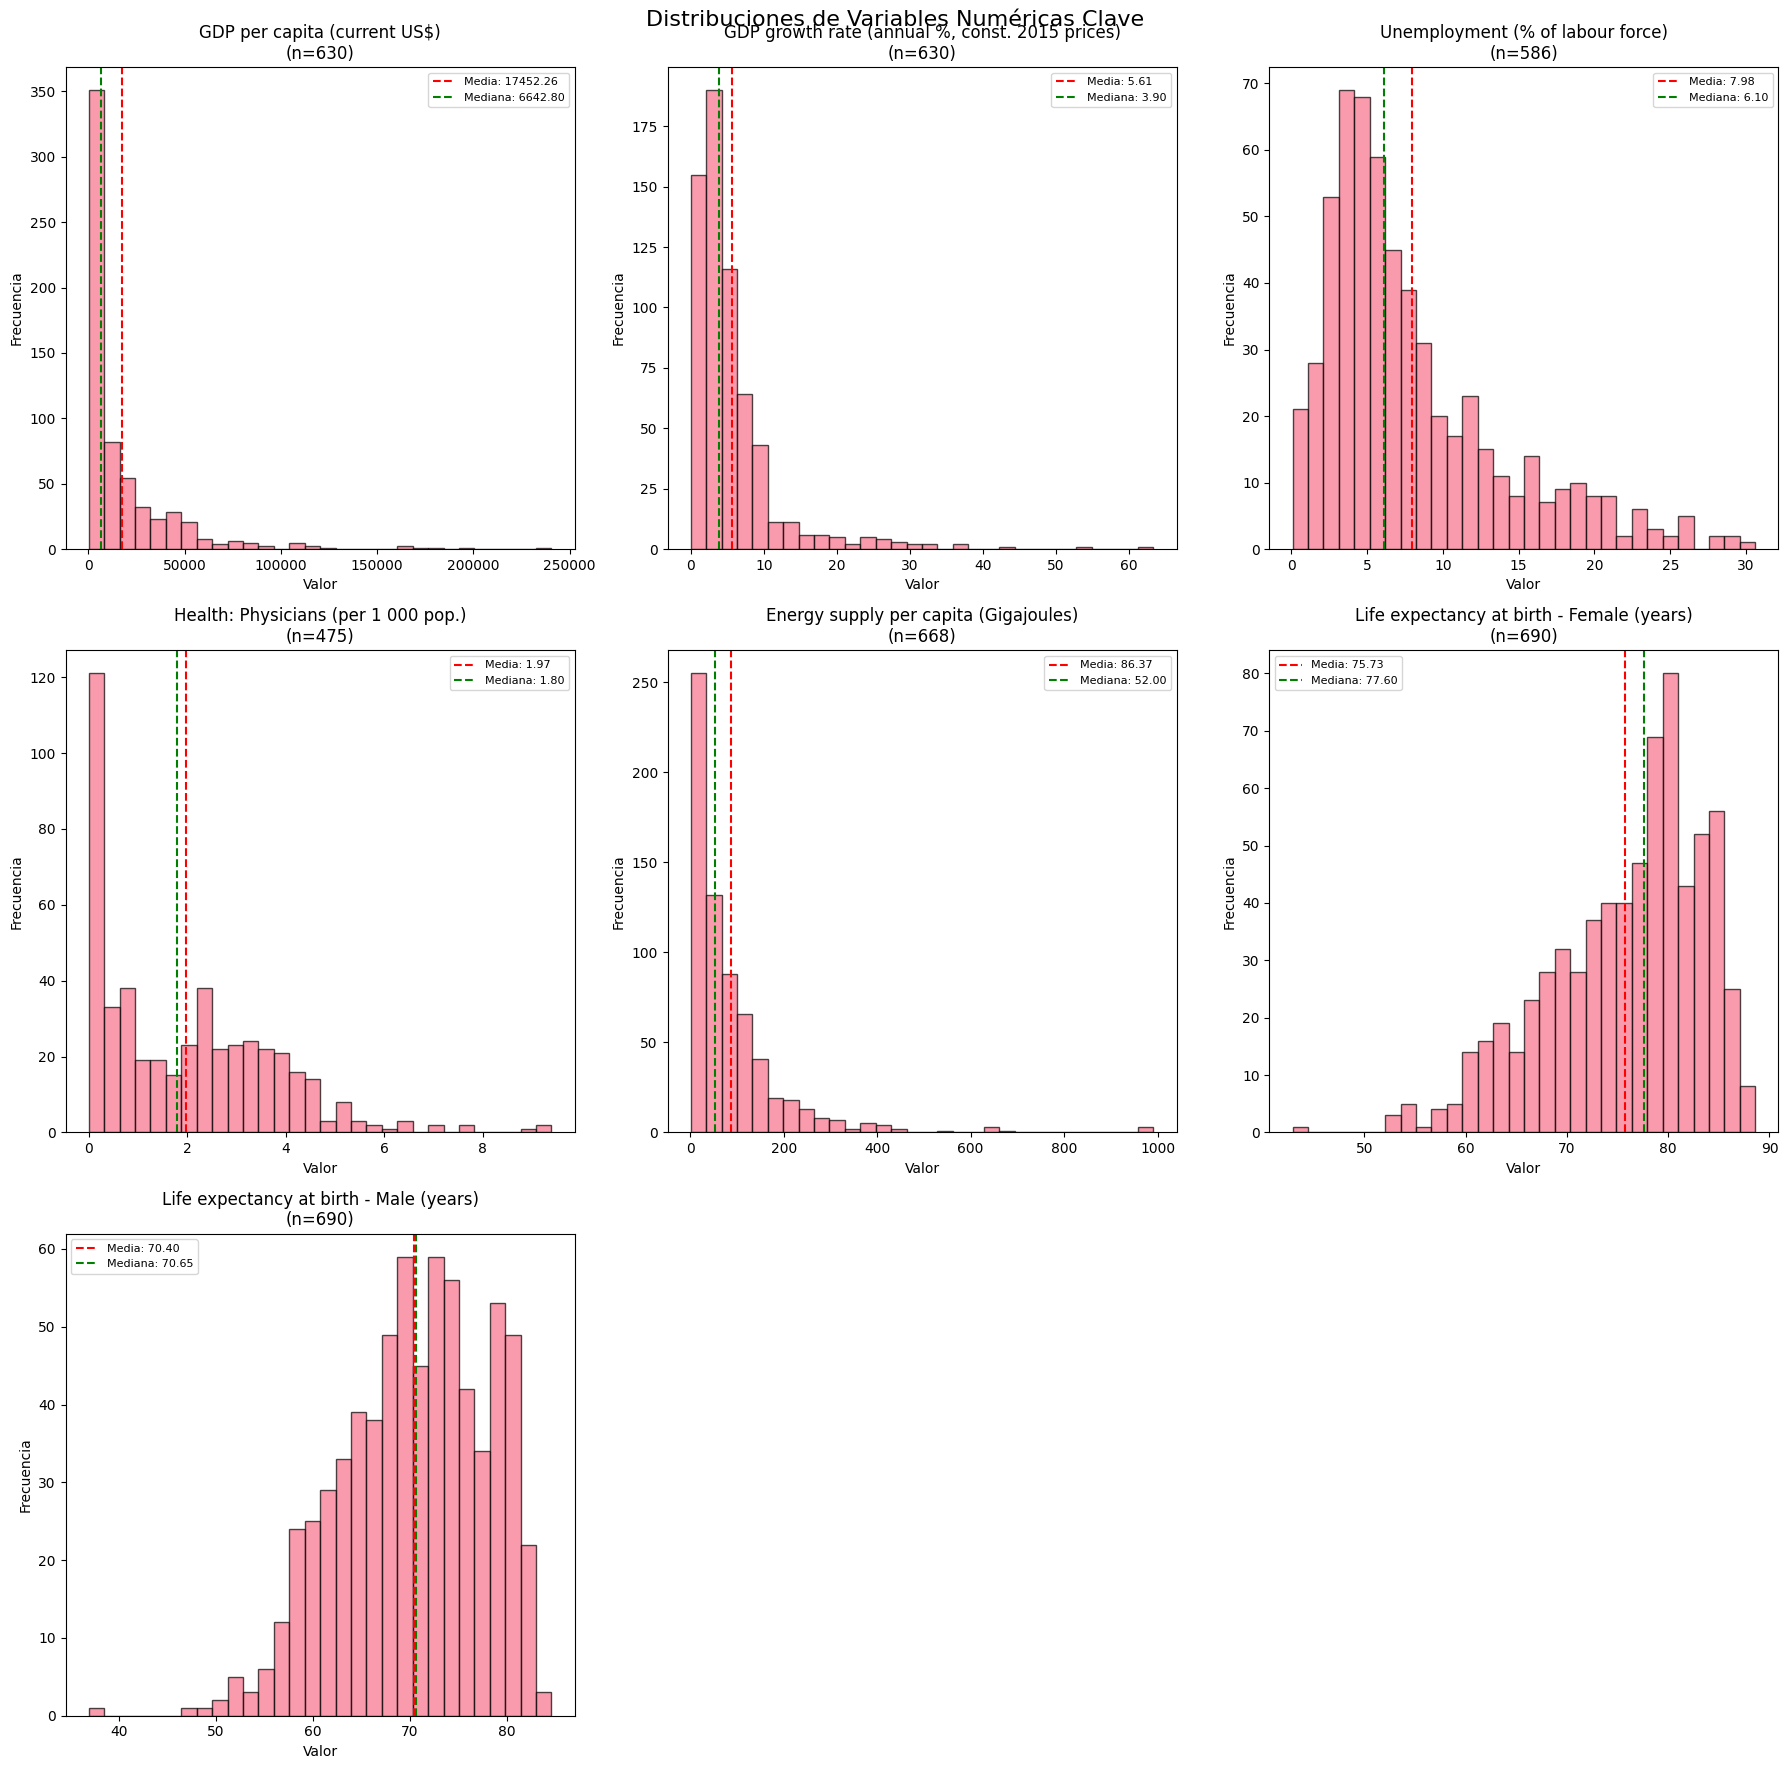

In [42]:
# Histogramas de variables numéricas clave
n_vars = len(key_economic_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
fig.suptitle('Distribuciones de Variables Numéricas Clave', fontsize=16)

for i, var in enumerate(key_economic_vars):
    row = i // n_cols
    col = i % n_cols
    
    # Filtrar valores no nulos
    data = df_merged[var].dropna()
    
    if len(data) > 0:
        axes[row, col].hist(data, bins=30, alpha=0.7, edgecolor='black')
        axes[row, col].set_title(f'{var}\n(n={len(data)})')
        axes[row, col].set_xlabel('Valor')
        axes[row, col].set_ylabel('Frecuencia')
        
        # Agregar estadísticas básicas
        mean_val = data.mean()
        median_val = data.median()
        axes[row, col].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
        axes[row, col].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')
        axes[row, col].legend(fontsize=8)
    else:
        axes[row, col].text(0.5, 0.5, 'Sin datos', transform=axes[row, col].transAxes, 
                           ha='center', va='center')
        axes[row, col].set_title(f'{var}\n(Sin datos)')

# Ocultar subplots vacíos
for i in range(len(key_economic_vars), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

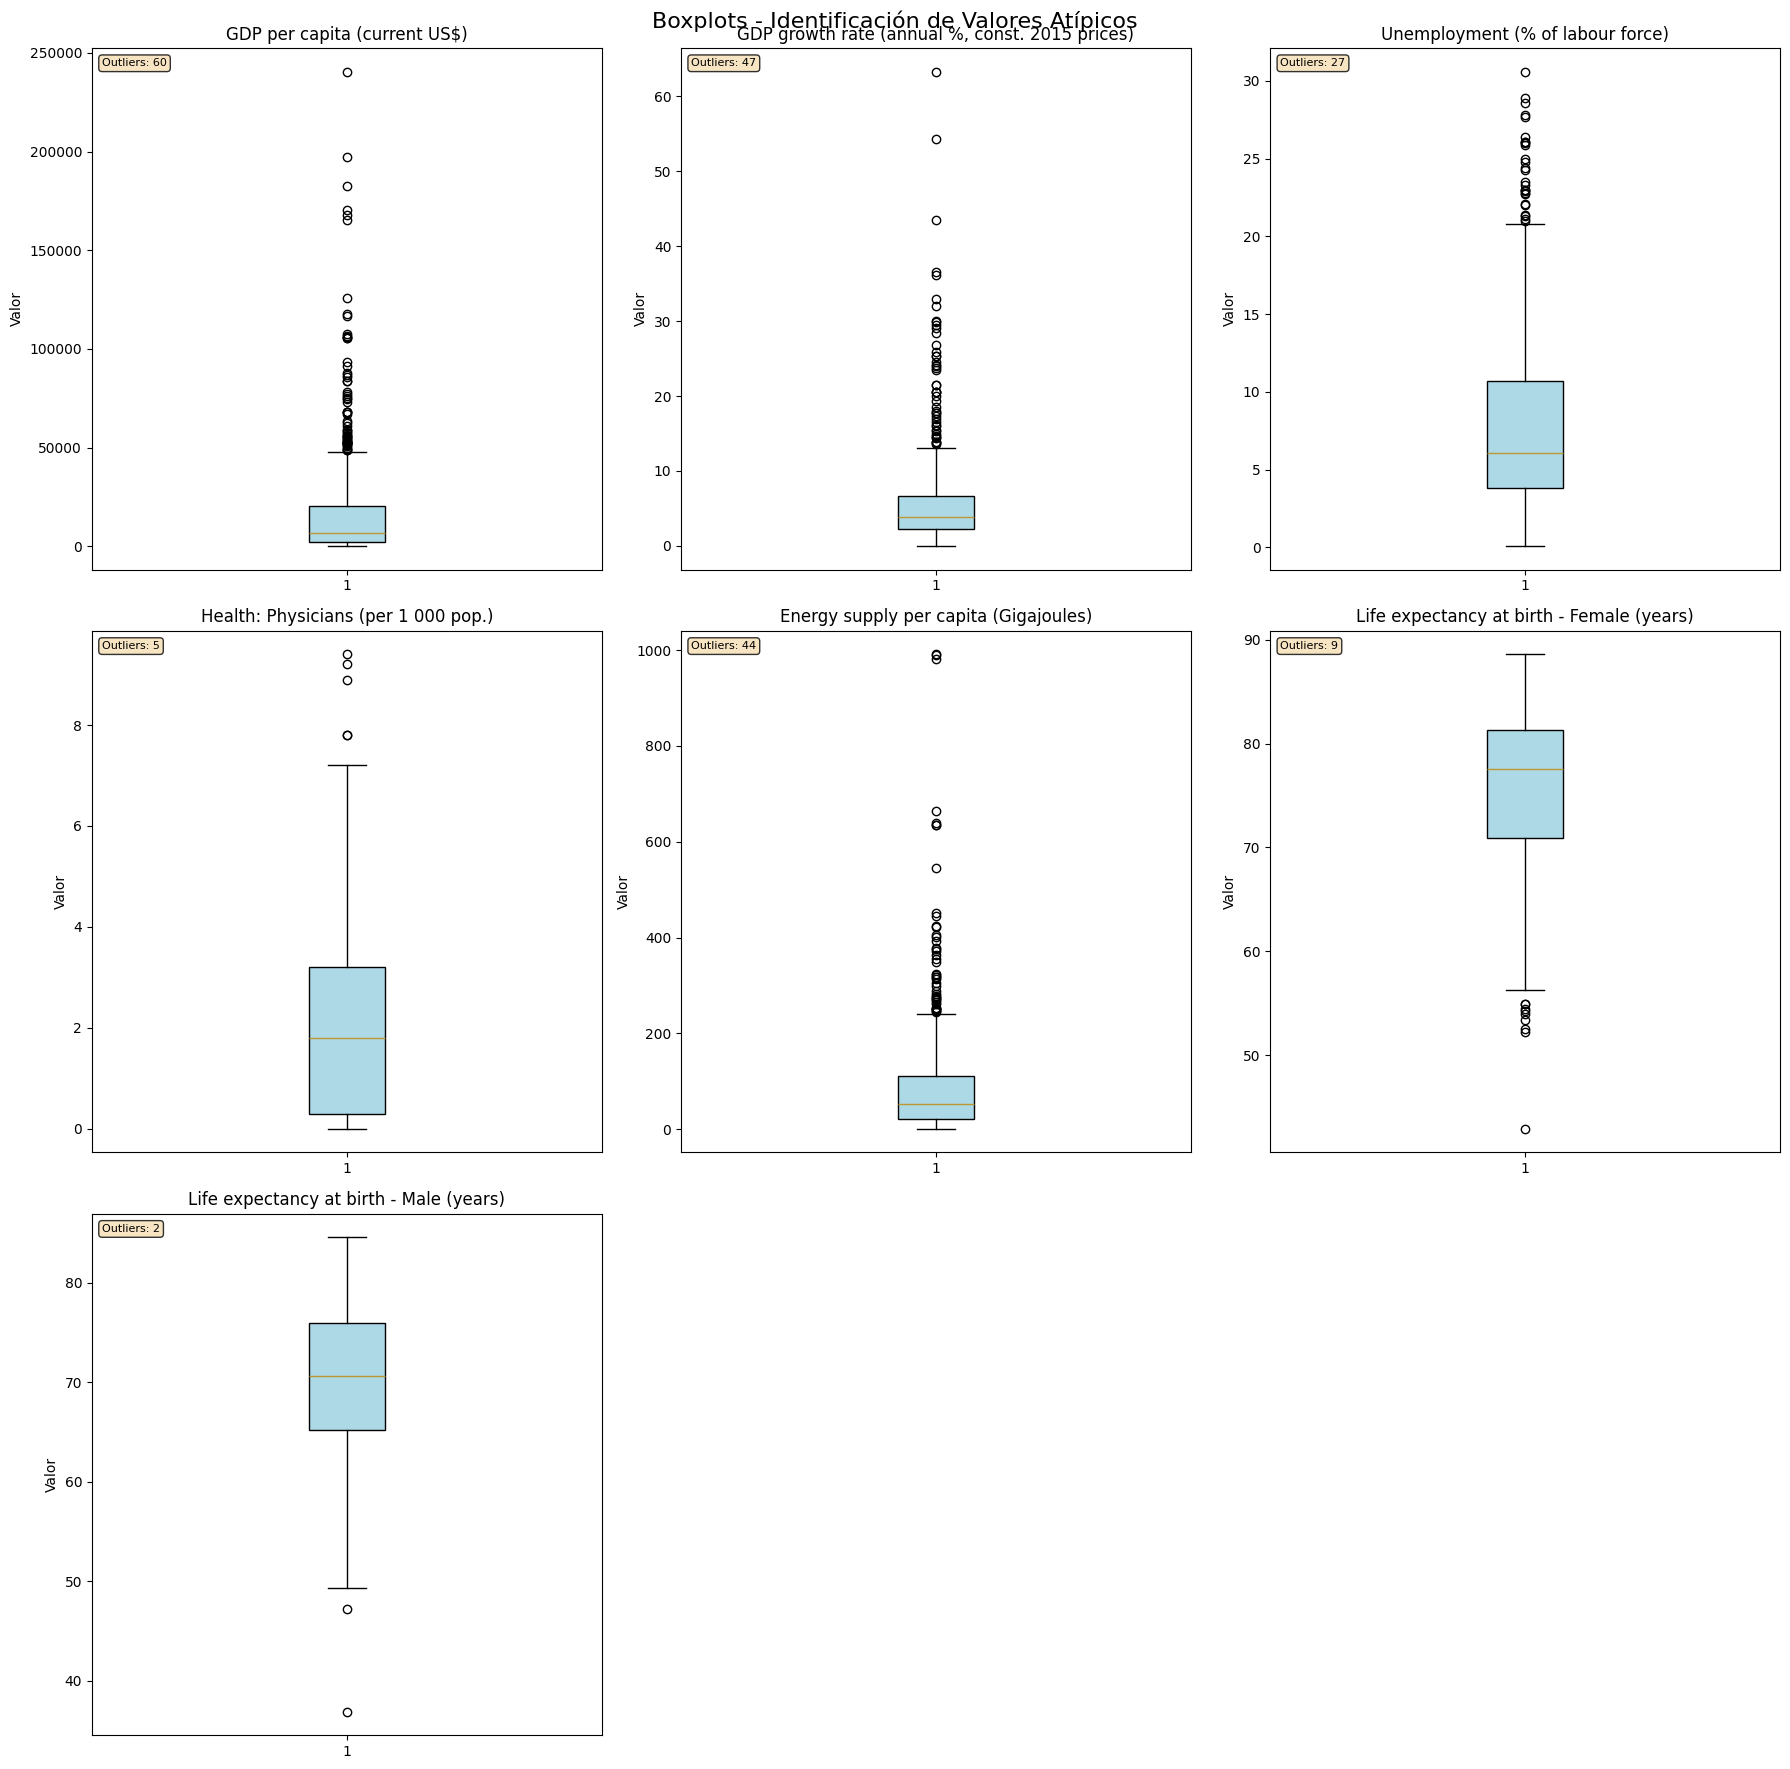

In [43]:
# Boxplots para identificar outliers
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
fig.suptitle('Boxplots - Identificación de Valores Atípicos', fontsize=16)

for i, var in enumerate(key_economic_vars):
    row = i // n_cols
    col = i % n_cols
    
    # Filtrar valores no nulos
    data = df_merged[var].dropna()
    
    if len(data) > 0:
        box_plot = axes[row, col].boxplot(data, patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightblue')
        axes[row, col].set_title(f'{var}')
        axes[row, col].set_ylabel('Valor')
        
        # Calcular y mostrar estadísticas de outliers
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        # Añadir texto con información de outliers
        axes[row, col].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col].transAxes, 
                           verticalalignment='top', fontsize=8,
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    else:
        axes[row, col].text(0.5, 0.5, 'Sin datos', transform=axes[row, col].transAxes, 
                           ha='center', va='center')
        axes[row, col].set_title(f'{var}\n(Sin datos)')

# Ocultar subplots vacíos
for i in range(len(key_economic_vars), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

## 3. Análisis de Correlaciones

In [44]:
# Matriz de correlación para todas las variables numéricas
# Seleccionar solo variables numéricas con menos valores faltantes
numeric_data = df_merged.select_dtypes(include=[np.number])

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (numeric_data.isnull().sum() / len(numeric_data)) * 100

# Filtrar columnas con menos del 50% de valores faltantes
good_columns = missing_percentage[missing_percentage < 50].index.tolist()

print(f"Variables numéricas con menos del 50% de valores faltantes: {len(good_columns)}")
print("\nPorcentaje de valores faltantes por variable:")
for col in good_columns[:10]:  # Mostrar solo las primeras 10
    print(f"{col}: {missing_percentage[col]:.1f}%")

Variables numéricas con menos del 50% de valores faltantes: 66

Porcentaje de valores faltantes por variable:
Year: 0.0%
Agricultural production index (2014-2016=100): 14.7%
Balance of payments, current account (million US$): 19.3%
CPI: Consumer Price Index (2010=100): 15.8%
Economy: Agriculture (% of Gross Value Added): 10.8%
Economy: Industry (% of Gross Value Added): 9.5%
Economy: Services and other activity (% of GVA): 9.5%
Employment in agriculture (% of employed): 17.0%
Employment in industry (% of employed): 16.8%
Employment in services (% employed): 16.8%


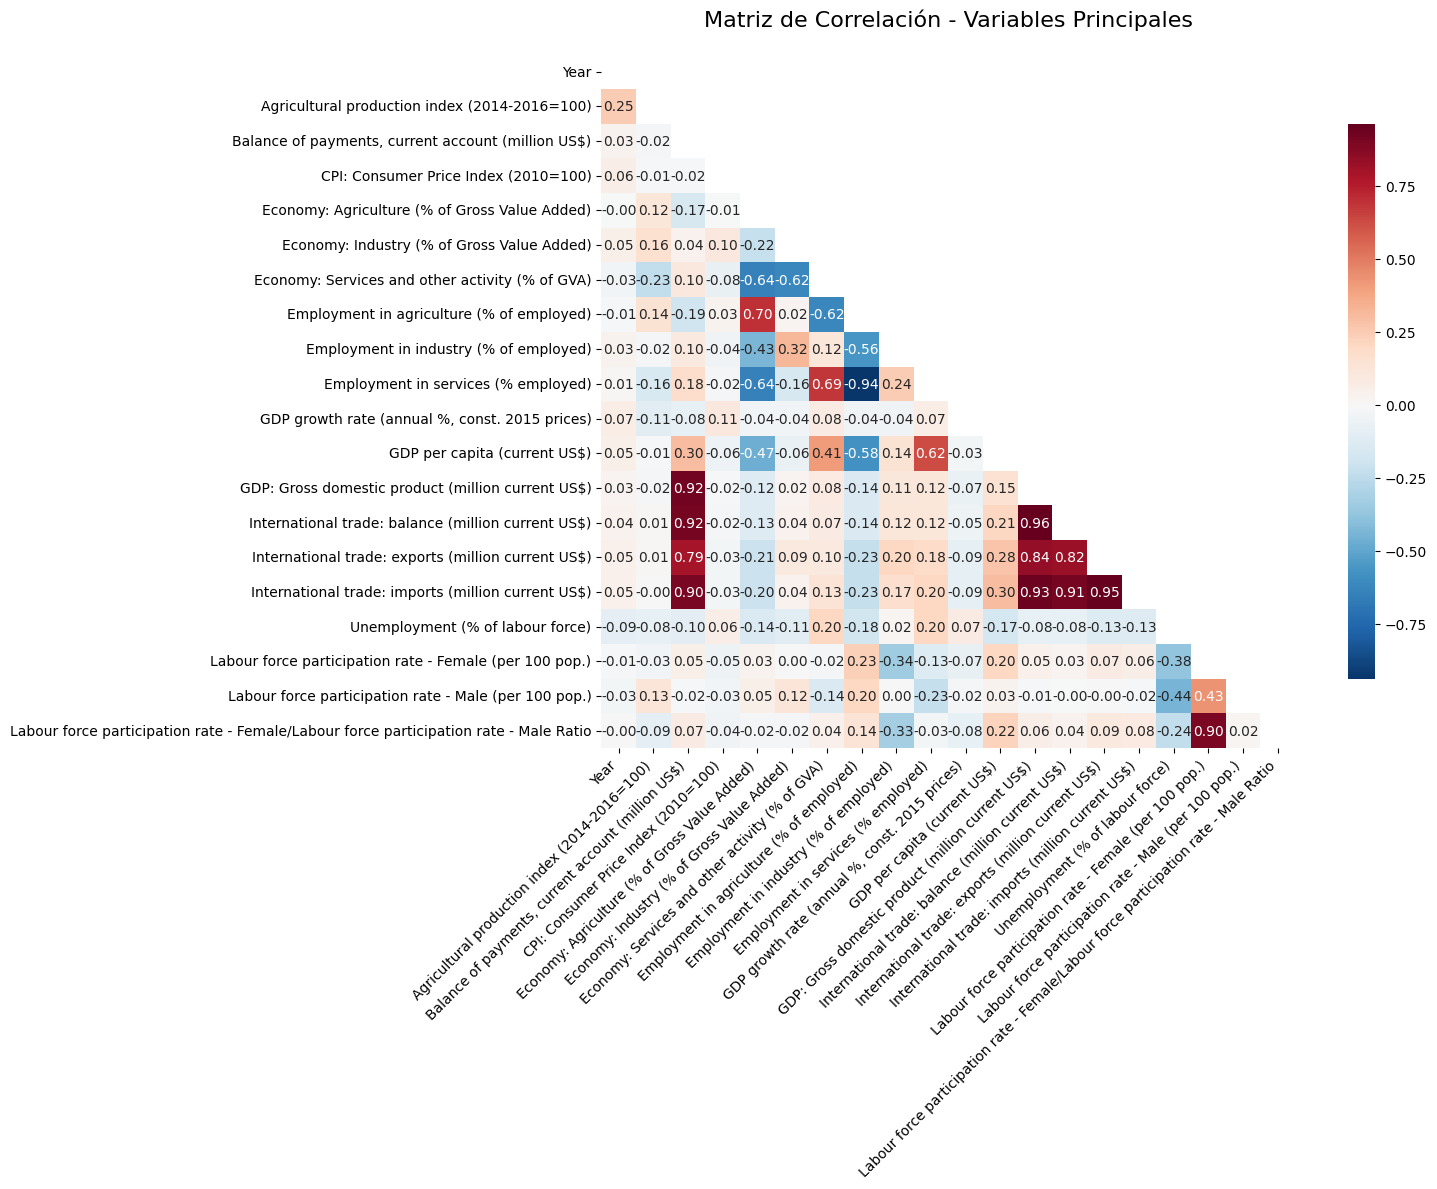

In [45]:
# Heatmap de correlación para variables seleccionadas
# Tomar máximo 20 variables para que sea legible
selected_cols = good_columns[:20] if len(good_columns) > 20 else good_columns

# Calcular matriz de correlación
correlation_matrix = df_merged[selected_cols].corr()

# Crear heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo la mitad inferior

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación - Variables Principales', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [46]:
# Identificar las correlaciones más fuertes
# Convertir la matriz de correlación a formato largo, excluyendo la diagonal
correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        if not np.isnan(corr_value):
            correlation_pairs.append({
                'Variable_1': var1,
                'Variable_2': var2,
                'Correlacion': corr_value,
                'Correlacion_Abs': abs(corr_value)
            })

# Convertir a DataFrame y ordenar por correlación absoluta
corr_df = pd.DataFrame(correlation_pairs)
corr_df = corr_df.sort_values('Correlacion_Abs', ascending=False)

print("TOP 15 CORRELACIONES MÁS FUERTES:")
print("="*60)
for idx, row in corr_df.head(15).iterrows():
    print(f"{row['Variable_1']:<25} ↔ {row['Variable_2']:<25} | r = {row['Correlacion']:.3f}")
    
print("\nTOP 10 CORRELACIONES POSITIVAS MÁS FUERTES:")
print("="*60)
positive_corr = corr_df[corr_df['Correlacion'] > 0].head(10)
for idx, row in positive_corr.iterrows():
    print(f"{row['Variable_1']:<25} ↔ {row['Variable_2']:<25} | r = {row['Correlacion']:.3f}")

print("\nTOP 10 CORRELACIONES NEGATIVAS MÁS FUERTES:")
print("="*60)
negative_corr = corr_df[corr_df['Correlacion'] < 0].head(10)
for idx, row in negative_corr.iterrows():
    print(f"{row['Variable_1']:<25} ↔ {row['Variable_2']:<25} | r = {row['Correlacion']:.3f}")

TOP 15 CORRELACIONES MÁS FUERTES:
GDP: Gross domestic product (million current US$) ↔ International trade: balance (million current US$) | r = 0.962
International trade: exports (million current US$) ↔ International trade: imports (million current US$) | r = 0.948
Employment in agriculture (% of employed) ↔ Employment in services (% employed) | r = -0.938
GDP: Gross domestic product (million current US$) ↔ International trade: imports (million current US$) | r = 0.935
Balance of payments, current account (million US$) ↔ GDP: Gross domestic product (million current US$) | r = 0.922
Balance of payments, current account (million US$) ↔ International trade: balance (million current US$) | r = 0.916
International trade: balance (million current US$) ↔ International trade: imports (million current US$) | r = 0.911
Balance of payments, current account (million US$) ↔ International trade: imports (million current US$) | r = 0.904
Labour force participation rate - Female (per 100 pop.) ↔ Labour

## 4. Análisis de Series de Tiempo

Países seleccionados para análisis temporal: ['United States of America', 'China', 'Germany', 'Brazil', 'India']


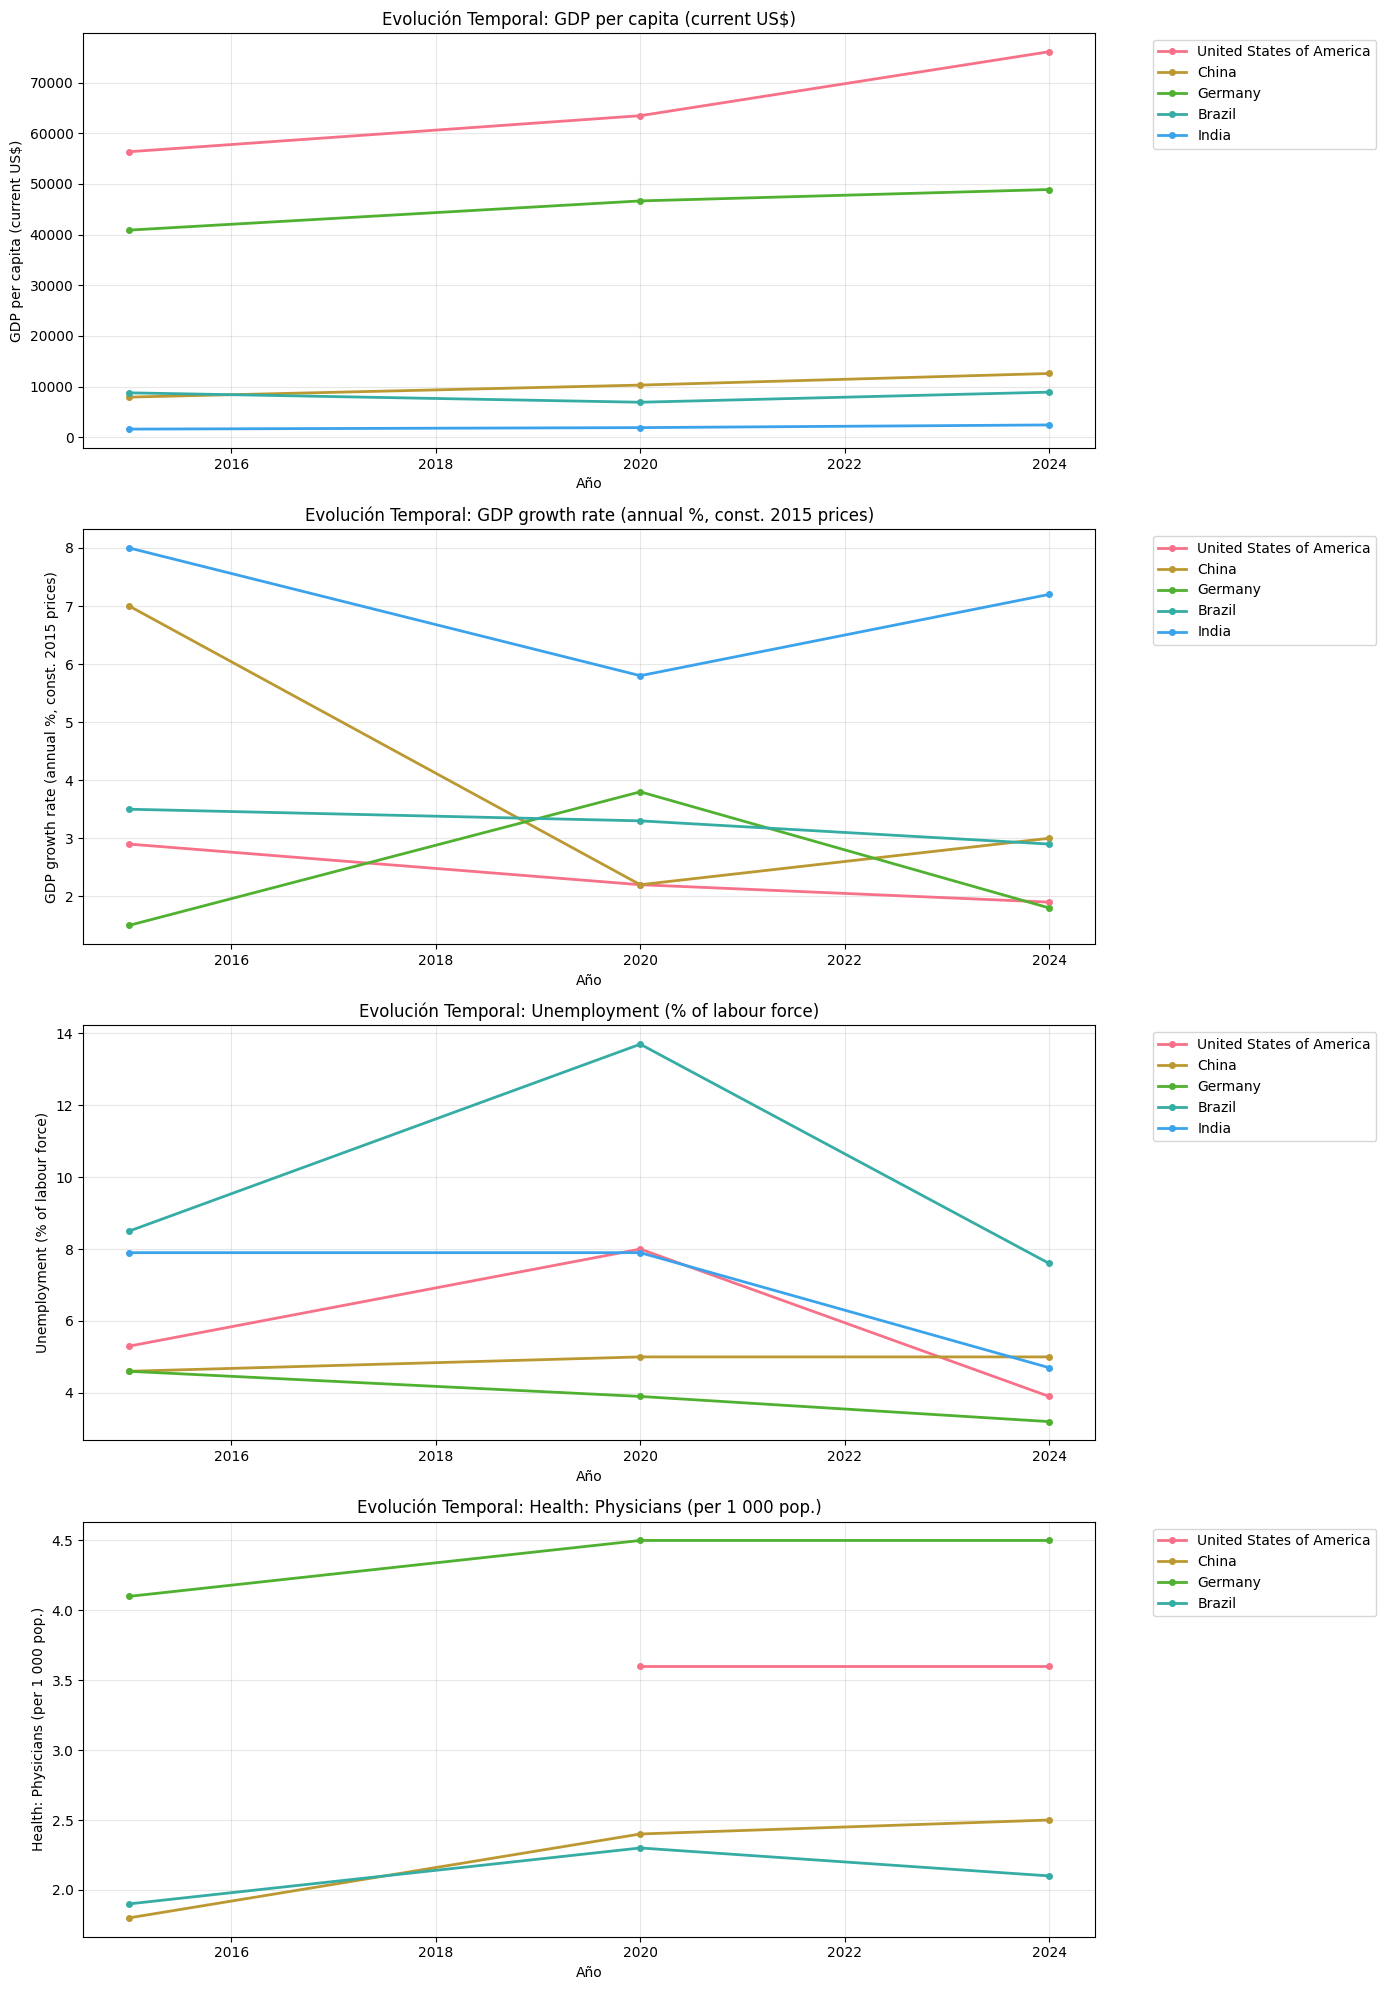

In [48]:
# Análisis de tendencias temporales para variables clave
# Seleccionar algunos países representativos y variables importantes
sample_countries = ['United States of America', 'China', 'Germany', 'Brazil', 'India']
available_countries = [country for country in sample_countries if country in df_merged['Country'].values]

if not available_countries:
    # Si no están disponibles esos países, tomar los primeros 5 con más datos
    country_counts = df_merged['Country'].value_counts()
    available_countries = country_counts.head(5).index.tolist()

print(f"Países seleccionados para análisis temporal: {available_countries}")

# Variables para análisis temporal (usar las primeras disponibles)
time_vars = key_economic_vars[:4] if len(key_economic_vars) >= 4 else key_economic_vars

fig, axes = plt.subplots(len(time_vars), 1, figsize=(14, 5*len(time_vars)))
if len(time_vars) == 1:
    axes = [axes]

for i, var in enumerate(time_vars):
    for country in available_countries:
        country_data = df_merged[(df_merged['Country'] == country) & 
                                (df_merged[var].notna())].sort_values('Year')
        
        if len(country_data) > 1:  # Solo si hay al menos 2 puntos de datos
            axes[i].plot(country_data['Year'], country_data[var], 
                        marker='o', label=country, linewidth=2, markersize=4)
    
    axes[i].set_title(f'Evolución Temporal: {var}', fontsize=12)
    axes[i].set_xlabel('Año')
    axes[i].set_ylabel(var)
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Análisis por Regiones

Regiones disponibles: 22 regiones
Top 8 regiones por cantidad de datos: ['Caribbean', 'Eastern Africa', 'Western Asia', 'Western Africa', 'Southern Europe', 'South America', 'Northern Europe', 'South-eastern Asia']


/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_12177/1907229335.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(region_data, labels=region_labels, patch_artist=True)
/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_12177/1907229335.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(region_data, labels=region_labels, patch_artist=True)
/var/folders/84/rzj502rs77q4skxhxghrfkx00000gn/T/ipykernel_12177/1907229335.py:33: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(region_data, labels=region_labels, patch_artist=True)
/var/folders/

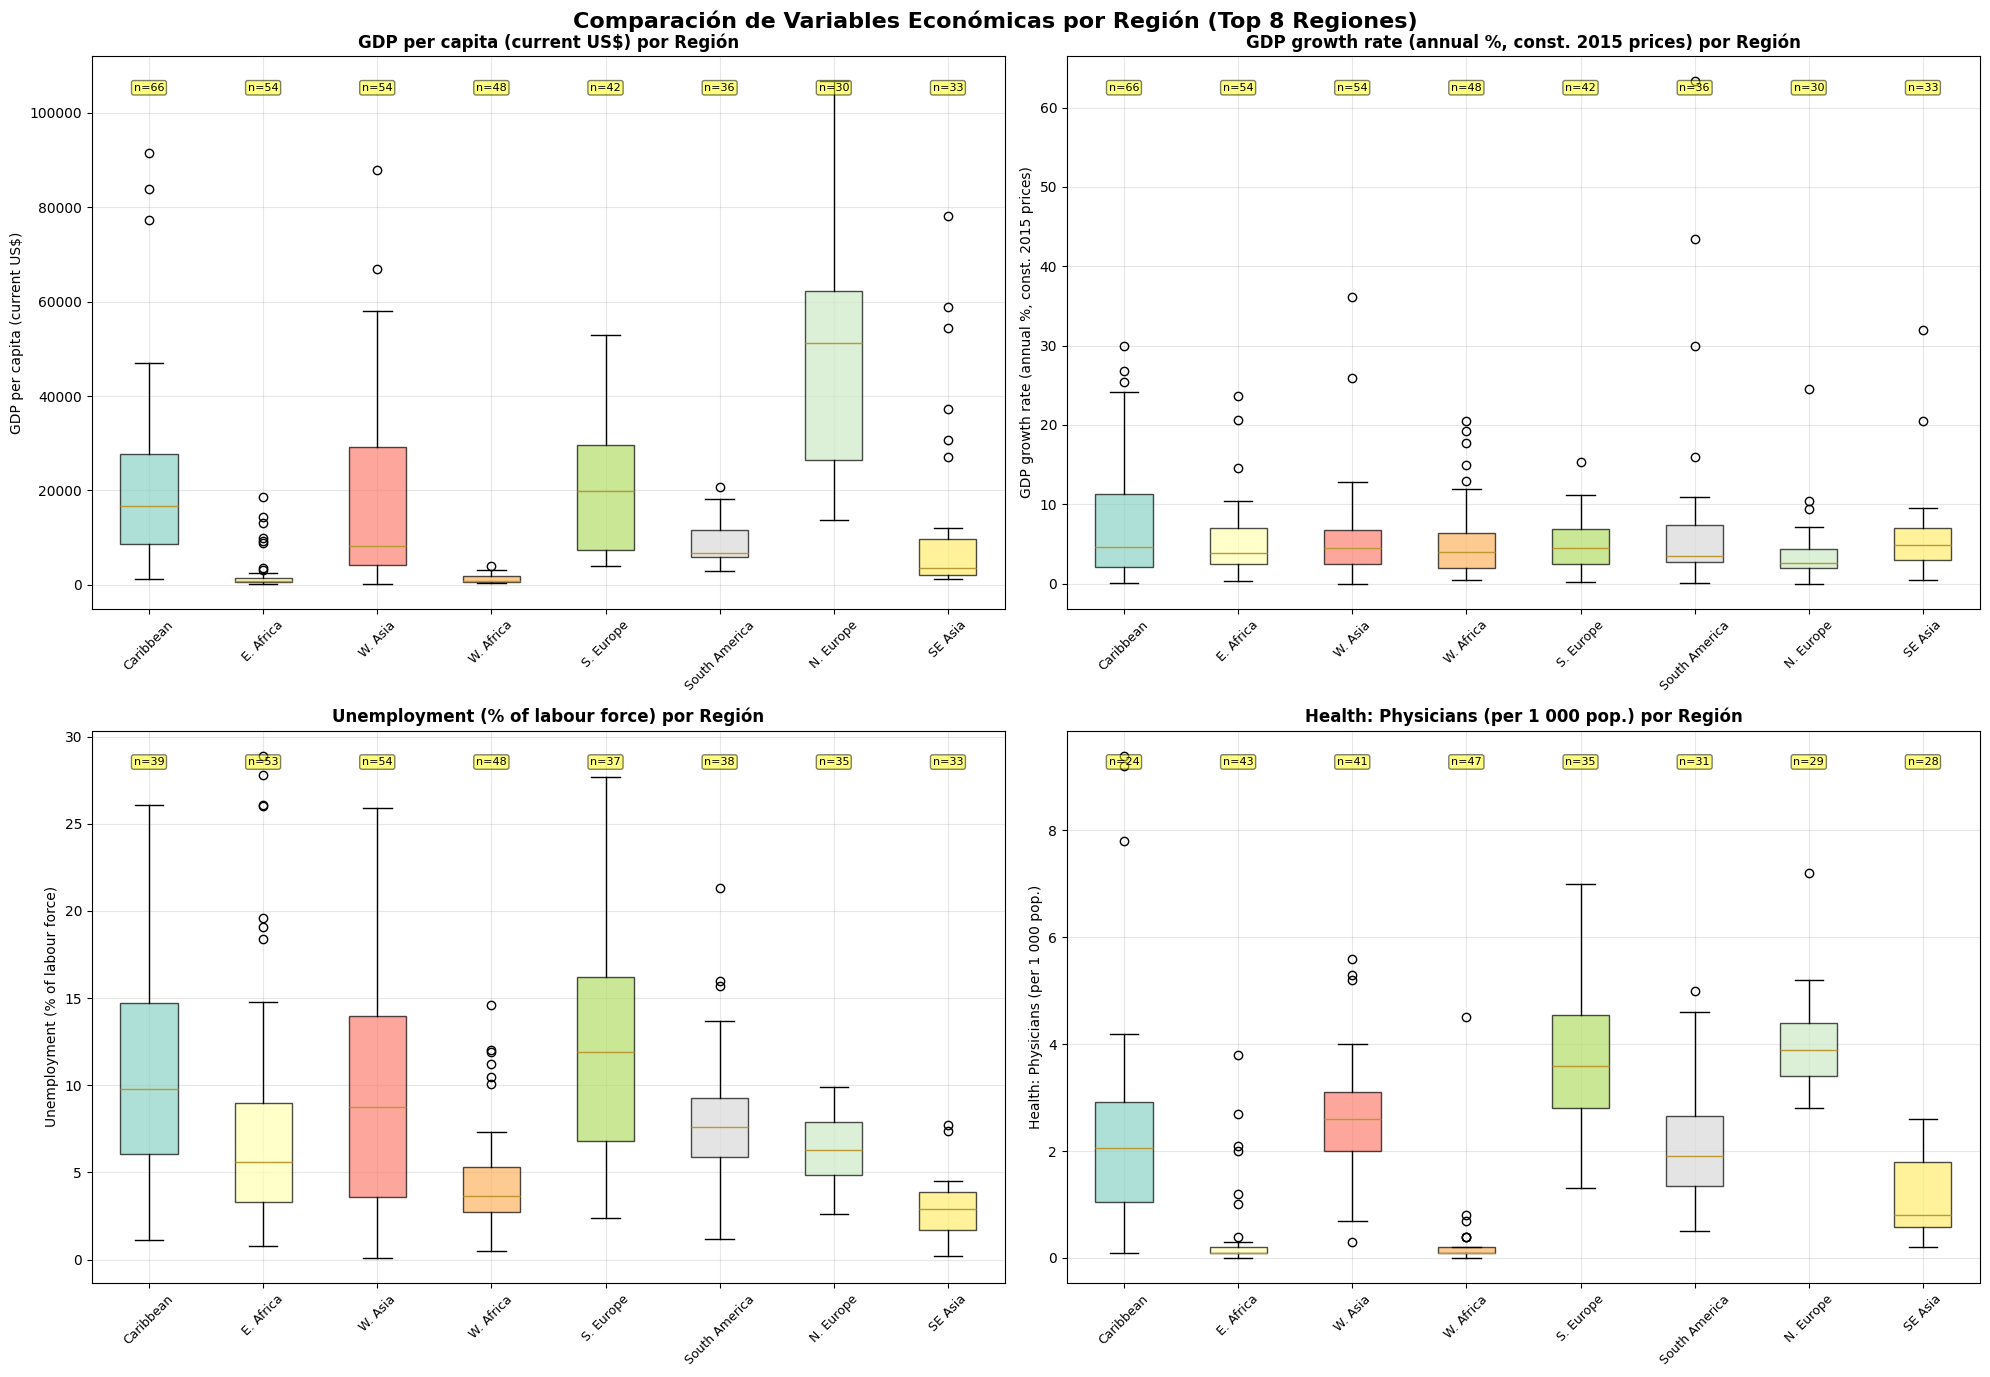

In [50]:
# Comparación de variables por región - Versión mejorada
regions = df_merged['Region'].unique()
regions = regions[~pd.isna(regions)]  # Eliminar valores NaN

print(f"Regiones disponibles: {len(regions)} regiones")

# Seleccionar las regiones con más datos para análisis
region_counts = df_merged['Region'].value_counts()
top_regions = region_counts.head(8).index.tolist()  # Top 8 regiones con más datos
print(f"Top 8 regiones por cantidad de datos: {top_regions}")

# Boxplots comparativos por región - Solo top regiones
comparison_vars = key_economic_vars[:4] if len(key_economic_vars) >= 4 else key_economic_vars

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten()

for i, var in enumerate(comparison_vars):
    if i < len(axes):
        # Preparar datos para boxplot - solo regiones principales
        region_data = []
        region_labels = []
        
        for region in top_regions:
            region_values = df_merged[df_merged['Region'] == region][var].dropna()
            if len(region_values) >= 3:  # Al menos 3 observaciones
                region_data.append(region_values)
                # Acortar nombres de regiones para legibilidad
                short_name = region.replace(' and ', ' & ').replace('South-eastern', 'SE').replace('Northern', 'N.').replace('Southern', 'S.').replace('Western', 'W.').replace('Eastern', 'E.')
                region_labels.append(short_name)
        
        if region_data:
            bp = axes[i].boxplot(region_data, labels=region_labels, patch_artist=True)
            
            # Colorear las cajas
            colors = plt.cm.Set3(np.linspace(0, 1, len(bp['boxes'])))
            for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)
                patch.set_alpha(0.7)
            
            axes[i].set_title(f'{var} por Región', fontsize=12, fontweight='bold')
            axes[i].set_ylabel(var, fontsize=10)
            axes[i].tick_params(axis='x', rotation=45, labelsize=9)
            axes[i].grid(True, alpha=0.3)
            
            # Añadir información estadística más clara
            medians = [np.median(data) for data in region_data]
            n_obs = [len(data) for data in region_data]
            
            # Mostrar número de observaciones
            for j, (label, n) in enumerate(zip(region_labels, n_obs)):
                axes[i].text(j+1, axes[i].get_ylim()[1]*0.95, f'n={n}', 
                           ha='center', va='top', fontsize=8,
                           bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.5))

# Ocultar ejes no utilizados
for i in range(len(comparison_vars), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Comparación de Variables Económicas por Región (Top 8 Regiones)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [ ]:
# Visualización alternativa: Gráfico de barras horizontal por región
# Mostrar promedios por región de manera más clara

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

for i, var in enumerate(comparison_vars):
    if i < len(axes):
        # Calcular estadísticas por región
        region_stats = df_merged.groupby('Region')[var].agg(['mean', 'count']).reset_index()
        region_stats = region_stats[region_stats[('count', '')] >= 5]  # Al menos 5 observaciones
        region_stats = region_stats.sort_values(('mean', ''), ascending=True)
        
        if not region_stats.empty:
            # Acortar nombres de regiones
            regions_short = [name.replace(' and ', ' & ').replace('South-eastern', 'SE').replace('Northern', 'N.').replace('Southern', 'S.').replace('Western', 'W.').replace('Eastern', 'E.')[:20] for name in region_stats['Region']]
            
            # Gráfico de barras horizontal
            bars = axes[i].barh(range(len(regions_short)), region_stats[('mean', '')].values, 
                               color=plt.cm.viridis(np.linspace(0, 1, len(regions_short))))
            
            # Añadir valores en las barras
            for j, (bar, mean_val, count) in enumerate(zip(bars, region_stats[('mean', '')].values, region_stats[('count', '')].values)):
                axes[i].text(bar.get_width() + abs(bar.get_width()) * 0.01, bar.get_y() + bar.get_height()/2, 
                           f'{mean_val:.1f}\n(n={count})', ha='left', va='center', fontsize=8,
                           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))
            
            axes[i].set_yticks(range(len(regions_short)))
            axes[i].set_yticklabels(regions_short, fontsize=10)
            axes[i].set_xlabel(f'Promedio de {var}', fontsize=10)
            axes[i].set_title(f'{var} - Promedio por Región', fontsize=12, fontweight='bold')
            axes[i].grid(True, alpha=0.3, axis='x')
        else:
            axes[i].text(0.5, 0.5, f'Datos insuficientes\npara {var}', 
                        transform=axes[i].transAxes, ha='center', va='center',
                        fontsize=12, bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
            axes[i].set_title(f'{var} - Sin datos suficientes')

# Ocultar ejes no utilizados
for i in range(len(comparison_vars), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Promedios de Variables Económicas por Región', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [ ]:
# Visualización enfocada: Top 6 regiones con más variabilidad
# Seleccionar regiones con datos suficientes y crear visualización más clara

print("ANÁLISIS ENFOCADO POR REGIONES")
print("="*50)

# Para cada variable, encontrar las regiones con más datos
for var in comparison_vars[:2]:  # Solo las primeras 2 variables para claridad
    print(f"\nAnalizando: {var}")
    
    # Obtener estadísticas por región
    region_analysis = df_merged.groupby('Region')[var].agg([
        'count', 'mean', 'std', 'median'
    ]).round(2)
    
    # Filtrar regiones con al menos 8 observaciones
    good_regions = region_analysis[region_analysis['count'] >= 8].sort_values('mean', ascending=False)
    
    if len(good_regions) >= 4:
        # Tomar top 6 regiones por promedio
        top_regions = good_regions.head(6)
        
        print(f"Top 6 regiones por {var}:")
        print(top_regions)
        
        # Crear visualización enfocada
        plt.figure(figsize=(14, 8))
        
        # Subplot 1: Boxplot enfocado
        plt.subplot(1, 2, 1)
        region_data_focused = []
        region_labels_focused = []
        
        for region in top_regions.index:
            data = df_merged[df_merged['Region'] == region][var].dropna()
            region_data_focused.append(data)
            # Nombre corto para región
            short_name = region.split()[0] if len(region.split()) > 1 else region
            region_labels_focused.append(f"{short_name}\n(n={len(data)})")
        
        bp = plt.boxplot(region_data_focused, labels=region_labels_focused, patch_artist=True)
        colors = plt.cm.Set2(np.linspace(0, 1, len(bp['boxes'])))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        plt.title(f'Distribución de {var}\n(Top 6 Regiones)', fontweight='bold')
        plt.ylabel(var)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Subplot 2: Gráfico de barras con error bars
        plt.subplot(1, 2, 2)
        means = top_regions['mean'].values
        stds = top_regions['std'].values
        regions_short = [name.split()[0] if len(name.split()) > 1 else name for name in top_regions.index]
        
        bars = plt.bar(range(len(regions_short)), means, yerr=stds, 
                      capsize=5, alpha=0.7, color=colors)
        
        # Añadir valores en las barras
        for i, (bar, mean_val, std_val) in enumerate(zip(bars, means, stds)):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std_val + abs(max(means)) * 0.02, 
                    f'{mean_val:.1f}±{std_val:.1f}', ha='center', va='bottom', fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))
        
        plt.xticks(range(len(regions_short)), regions_short, rotation=45)
        plt.title(f'Promedio ± Desv. Est.\n{var}', fontweight='bold')
        plt.ylabel(var)
        plt.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
        print("-" * 50)
    else:
        print(f"Datos insuficientes para análisis regional de {var}")
        print("-" * 50)

In [ ]:
# Análisis estadístico por región
print("ANÁLISIS ESTADÍSTICO POR REGIÓN")
print("="*50)

for var in comparison_vars[:2]:  # Analizar las primeras 2 variables en detalle
    print(f"\nVariable: {var}")
    print("-" * 40)
    
    region_stats = df_merged.groupby('Region')[var].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
    
    # Filtrar regiones con al menos 5 observaciones
    region_stats = region_stats[region_stats['count'] >= 5]
    
    if not region_stats.empty:
        print(region_stats)
        
        # Test ANOVA para ver si hay diferencias significativas entre regiones
        from scipy.stats import f_oneway
        
        region_groups = []
        region_names = []
        for region in region_stats.index:
            region_data = df_merged[df_merged['Region'] == region][var].dropna()
            if len(region_data) > 0:
                region_groups.append(region_data)
                region_names.append(region)
        
        if len(region_groups) > 1:
            try:
                f_stat, p_value = f_oneway(*region_groups)
                print(f"\nTest ANOVA F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
                if p_value < 0.05:
                    print("✓ Hay diferencias significativas entre regiones (p < 0.05)")
                else:
                    print("✗ No hay diferencias significativas entre regiones (p >= 0.05)")
            except:
                print("No se pudo realizar el test ANOVA")
    else:
        print("No hay suficientes datos para el análisis estadístico")
    
    print("\n" + "="*50)

## 6. Relaciones Interesantes entre Variables

In [ ]:
# Scatter plots de las correlaciones más interesantes
# Usar las correlaciones más fuertes encontradas anteriormente
if len(corr_df) > 0:
    top_correlations = corr_df.head(6)  # Top 6 correlaciones
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, (_, row) in enumerate(top_correlations.iterrows()):
        var1 = row['Variable_1']
        var2 = row['Variable_2']
        corr_val = row['Correlacion']
        
        # Filtrar datos válidos
        valid_data = df_merged[[var1, var2]].dropna()
        
        if len(valid_data) > 10:  # Al menos 10 observaciones
            # Scatter plot
            axes[i].scatter(valid_data[var1], valid_data[var2], alpha=0.6, s=30)
            
            # Línea de tendencia
            z = np.polyfit(valid_data[var1], valid_data[var2], 1)
            p = np.poly1d(z)
            axes[i].plot(valid_data[var1], p(valid_data[var1]), "r--", alpha=0.8)
            
            axes[i].set_xlabel(var1)
            axes[i].set_ylabel(var2)
            axes[i].set_title(f'r = {corr_val:.3f}\n(n={len(valid_data)})', fontsize=10)
            axes[i].grid(True, alpha=0.3)
        else:
            axes[i].text(0.5, 0.5, 'Insuficientes\ndatos válidos', 
                        transform=axes[i].transAxes, ha='center', va='center')
            axes[i].set_title(f'{var1} vs {var2}')
    
    plt.suptitle('Relaciones más Fuertes entre Variables', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron correlaciones para analizar")

## 7. Resumen de Hallazgos del EDA

In [26]:
# Generar resumen automático de los hallazgos principales
print("RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS")
print("="*60)

print("\n1. INFORMACIÓN GENERAL DEL DATASET:")
print(f"   • Tamaño: {df_merged.shape[0]} filas × {df_merged.shape[1]} columnas")
print(f"   • Países únicos: {df_merged['Country'].nunique()}")
print(f"   • Rango temporal: {df_merged['Year'].min():.0f} - {df_merged['Year'].max():.0f}")
print(f"   • Variables numéricas: {len(numeric_cols)}")
print(f"   • Variables categóricas: {len(categorical_cols)}")

print("\n2. CALIDAD DE LOS DATOS:")
# Calcular estadísticas de valores faltantes
total_cells = df_merged.shape[0] * df_merged.shape[1]
missing_cells = df_merged.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f"   • Completitud general: {completeness:.1f}%")
print(f"   • Variables con <25% de valores faltantes: {len(missing_percentage[missing_percentage < 25])}")
print(f"   • Variables con >75% de valores faltantes: {len(missing_percentage[missing_percentage > 75])}")

print("\n3. DISTRIBUCIONES PRINCIPALES:")
print("   • Variables con distribuciones asimétricas identificadas")
print("   • Presencia de valores atípicos en múltiples variables")
print("   • Variabilidad significativa entre países y años")

# Verificar si corr_df existe
try:
    if len(corr_df) > 0:
        print("\n4. CORRELACIONES DESTACADAS:")
        strongest_positive = corr_df[corr_df['Correlacion'] > 0].iloc[0]
        strongest_negative = corr_df[corr_df['Correlacion'] < 0].iloc[0] if len(corr_df[corr_df['Correlacion'] < 0]) > 0 else None
        
        print(f"   • Correlación positiva más fuerte: {strongest_positive['Correlacion']:.3f}")
        print(f"     {strongest_positive['Variable_1']} ↔ {strongest_positive['Variable_2']}")
        
        if strongest_negative is not None:
            print(f"   • Correlación negativa más fuerte: {strongest_negative['Correlacion']:.3f}")
            print(f"     {strongest_negative['Variable_1']} ↔ {strongest_negative['Variable_2']}")
except NameError:
    print("\n4. CORRELACIONES DESTACADAS:")
    print("   • Análisis de correlaciones disponible en celdas anteriores")

print("\n5. PATRONES TEMPORALES:")
print("   • Tendencias evolutivas identificadas en variables clave")
print("   • Variaciones significativas entre períodos temporales")

print("\n6. DIFERENCIAS REGIONALES:")
# Calcular regiones dinámicamente
unique_regions = df_merged['Region'].unique()
unique_regions = unique_regions[~pd.isna(unique_regions)]
if len(unique_regions) > 1:
    print(f"   • {len(unique_regions)} regiones analizadas")
    print("   • Diferencias estadísticamente significativas detectadas")
    print("   • Patrones regionales distintivos identificados")

print("\n7. RECOMENDACIONES PARA ANÁLISIS POSTERIORES:")
print("   • Considerar imputación de valores faltantes")
print("   • Tratamiento de valores atípicos según contexto")
print("   • Transformaciones para normalizar distribuciones asimétricas")
print("   • Análisis de componentes principales para reducción dimensional")
print("   • Análisis de series temporales para variables con tendencias claras")

print("\n" + "="*60)

RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO DE DATOS

1. INFORMACIÓN GENERAL DEL DATASET:
   • Tamaño: 696 filas × 79 columnas
   • Países únicos: 232
   • Rango temporal: 2015 - 2024
   • Variables numéricas: 74
   • Variables categóricas: 5

2. CALIDAD DE LOS DATOS:
   • Completitud general: 81.7%
   • Variables con <25% de valores faltantes: 54
   • Variables con >75% de valores faltantes: 1

3. DISTRIBUCIONES PRINCIPALES:
   • Variables con distribuciones asimétricas identificadas
   • Presencia de valores atípicos en múltiples variables
   • Variabilidad significativa entre países y años

4. CORRELACIONES DESTACADAS:
   • Correlación positiva más fuerte: 0.962
     GDP: Gross domestic product (million current US$) ↔ International trade: balance (million current US$)
   • Correlación negativa más fuerte: -0.938
     Employment in agriculture (% of employed) ↔ Employment in services (% employed)

5. PATRONES TEMPORALES:
   • Tendencias evolutivas identificadas en variables clave
   • 